# Caso 1: Creditcard Regresión

# Paso 1: Muestra

## 1.1 Cargar el conjunto de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Cargamos el conjunto de datos
creditcard = pd.read_csv("./Data/Regresion-Creditcard.csv")

# Visualizar las primeras filas del conjunto de datos
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


- V1, V2, V3, ..., V28: Son transformaciones derivadas de las características originales debido a técnicas de anonimización
- Time: Representa el tiempo transcurrido desde la primera transacción
- Amount: Indica el valor monetario de la transacción.

## 1.2 Verificar el tamaño del conjunto de datos
- A continuación, verifiquemos el tamaño del conjunto de datos.

In [2]:
# Comprobación de la forma del conjunto de datos
print('Cantidad de Filas y columnas:',creditcard.shape)
print('\nNombre columnas:',creditcard.columns)

Cantidad de Filas y columnas: (99999, 30)

Nombre columnas: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [3]:
# tipos de datos
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99999 non-null  int64  
 1   V1      99999 non-null  float64
 2   V2      99999 non-null  float64
 3   V3      99999 non-null  float64
 4   V4      99999 non-null  float64
 5   V5      99999 non-null  float64
 6   V6      99999 non-null  float64
 7   V7      99999 non-null  float64
 8   V8      99999 non-null  float64
 9   V9      99999 non-null  float64
 10  V10     99999 non-null  float64
 11  V11     99999 non-null  float64
 12  V12     99999 non-null  float64
 13  V13     99999 non-null  float64
 14  V14     99999 non-null  float64
 15  V15     99999 non-null  float64
 16  V16     99999 non-null  float64
 17  V17     99999 non-null  float64
 18  V18     99999 non-null  float64
 19  V19     99999 non-null  float64
 20  V20     99999 non-null  float64
 21  V21     99999 non-null  float64
 22

In [4]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,42432.982130,-0.262096,-0.032374,0.676251,0.162603,-0.278507,0.094066,-0.108712,0.056009,-0.046529,...,0.044568,-0.030852,-0.109079,-0.037027,0.008982,0.132193,0.026657,0.000606,0.001730,97.962094
std,17044.825093,1.859057,1.656854,1.322888,1.349249,1.356376,1.301356,1.210925,1.207528,1.121255,...,0.759444,0.718882,0.634301,0.632911,0.595255,0.441065,0.494541,0.393700,0.325159,264.624210
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000
25%,33471.500000,-1.028101,-0.598711,0.176781,-0.711442,-0.898645,-0.647870,-0.600209,-0.137457,-0.698812,...,-0.169246,-0.224509,-0.531305,-0.176416,-0.323712,-0.131794,-0.325102,-0.062534,-0.005355,7.570000
50%,44299.000000,-0.260556,0.078315,0.753991,0.192567,-0.314370,-0.157022,-0.069107,0.074130,-0.119105,...,-0.024571,-0.057669,-0.083855,-0.049239,0.064999,0.170104,-0.070347,0.009832,0.023318,26.310000
75%,55851.000000,1.153327,0.735736,1.376333,1.032416,0.249733,0.486356,0.414667,0.360506,0.558226,...,0.170597,0.119190,0.308337,0.081522,0.406281,0.419906,0.300683,0.083025,0.076568,89.000000
max,67374.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,39.420904,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000


### Resumen estadístico de las columnas numericas del dataframe

- count: El número de valores no nulos en la columna. Indica cuántas observaciones hay.

- mean: La media aritmética de los valores. Es el promedio de la columna.

- std: La desviación estándar, que mide la dispersión de los datos respecto a la media. Una desviación estándar alta indica que los datos están más dispersos.

- min: El valor mínimo en la columna.

- 25%: El primer cuartil (Q1), que es el valor que divide el 25% inferior de los datos del 75% superior.

- 50%: La mediana (Q2), que es el valor que divide la mitad de los datos.

- 75%: El tercer cuartil (Q3), que es el valor que divide el 75% inferior de los datos del 25% superior.

- max: El valor máximo en la columna.

## 1.3 Partición de datos

In [5]:
# División de los datos en conjuntos de entrenamiento y validación (división 80-20)
train_data, validation_data = train_test_split(creditcard, test_size=0.2, random_state=42)

# Comprobación del tamaño de los conjuntos de datos de entrenamiento y validación
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]

train_size, validation_size

(79999, 20000)

- Conjunto de entrenamiento: 79999 entradas
- Conjunto de validación: 20000 entradas

Una vez completado el paso "Muestra", pasaremos a la fase "Explorar", donde analizaremos la distribución, las estadísticas y las visualizaciones del conjunto de datos para comprender mejor su estructura y características.

# Paso 2: Explorar

## 2.1 Estadísticas resumidas
- Calcular estadísticas resumidas. Visualice la distribución de características clave. Comprobando si hay anomalías en los datos, como valores faltantes y valores atípicos.

In [6]:
# Cálculo de estadísticas resumidas para los datos de entrenamiento
summary_statistics = train_data.describe()

summary_statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,...,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,42463.081101,-0.264142,-0.031702,0.674787,0.159998,-0.280068,0.091964,-0.111927,0.056655,-0.046847,...,0.043942,-0.030070,-0.109119,-0.037158,0.007791,0.132035,0.027972,0.000985,0.001428,97.802880
std,17054.974960,1.867719,1.664088,1.330321,1.348169,1.365567,1.304840,1.215889,1.223405,1.119452,...,0.759748,0.724943,0.634871,0.634633,0.594714,0.441396,0.495238,0.391345,0.328227,264.162249
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000
25%,33494.500000,-1.029196,-0.600000,0.174747,-0.714938,-0.901298,-0.649981,-0.600696,-0.138032,-0.699501,...,-0.169715,-0.223700,-0.530643,-0.176955,-0.324751,-0.130879,-0.324645,-0.062969,-0.005367,7.580000
50%,44347.000000,-0.259831,0.078975,0.753016,0.190633,-0.315587,-0.156946,-0.070927,0.074542,-0.118600,...,-0.024970,-0.057082,-0.083472,-0.049620,0.064124,0.170116,-0.069879,0.009512,0.023286,26.590000
75%,55890.000000,1.153444,0.735556,1.374665,1.028406,0.248564,0.485180,0.411649,0.360506,0.556464,...,0.169450,0.119652,0.309047,0.081673,0.405749,0.419632,0.305565,0.082644,0.076377,89.500000
max,67374.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.348407,...,39.420904,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000


## 2.2 Visualización
- A continuación, visualizaremos la distribución de características clave

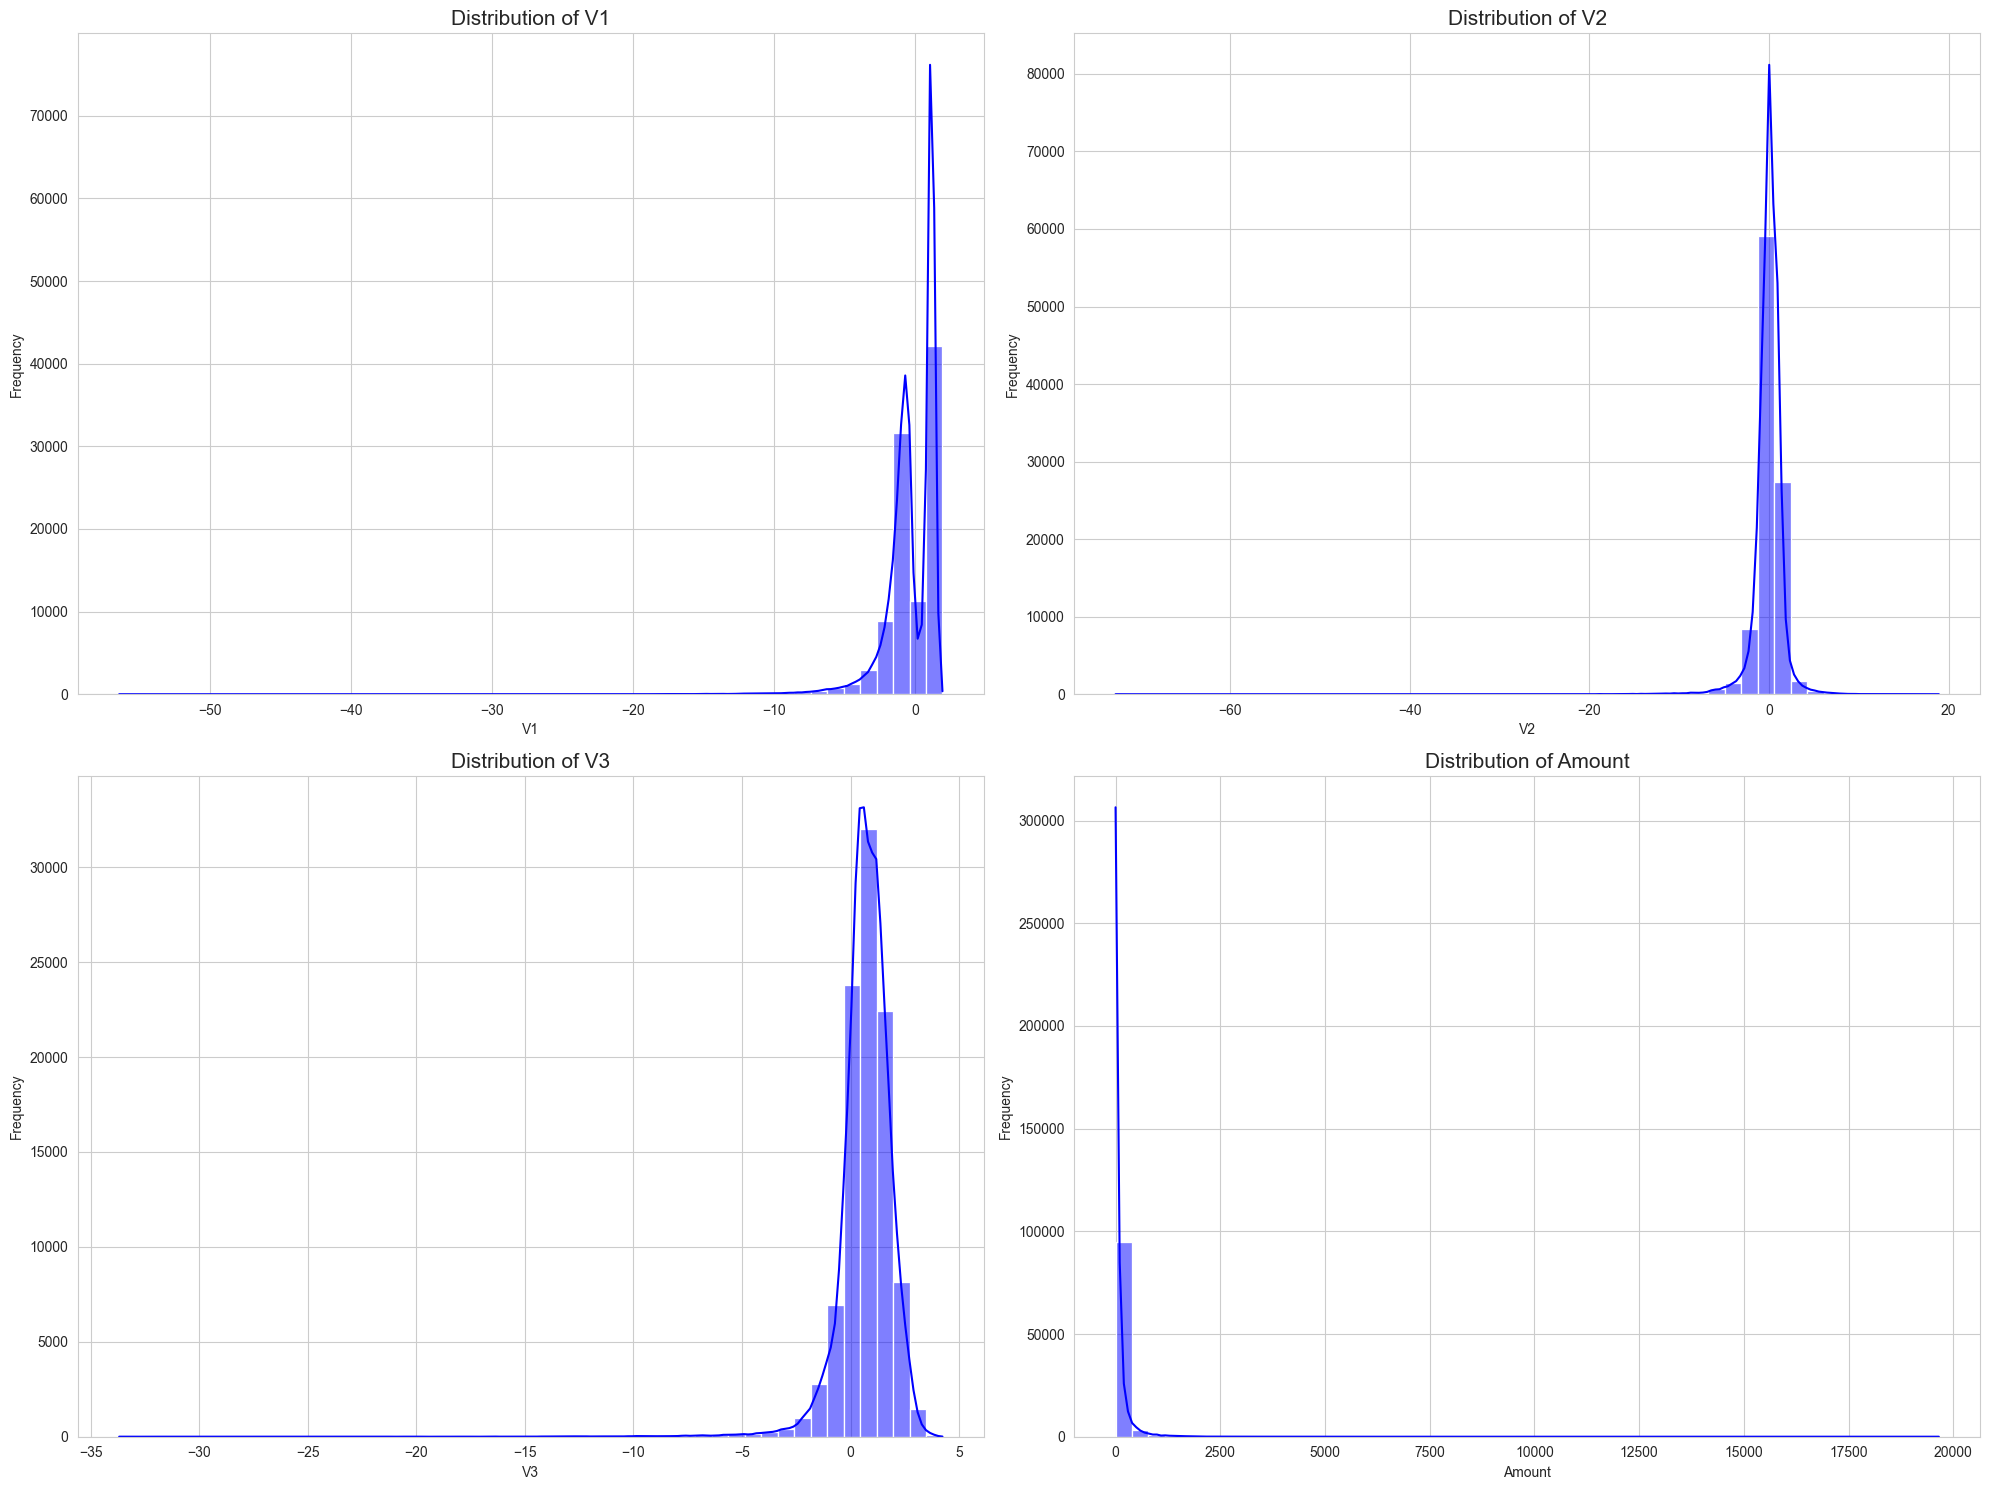

In [7]:
# Estableciendo los estilos para los plots
sns.set_style("whitegrid")

# Seleccionamos algunas características clave para visualizar su distribución
features = ['V1', 'V2', 'V3', 'Amount']

# Visualizar la distribución de cada característica
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(creditcard[feature], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {feature}', fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.3 Anomalías de datos
- A continuación, debemos investigar posibles anomalías, como:
- Valores cero en las variables anonimizadas
- Valores nulos dentro del dataframe

In [8]:
zero_values = {
    'v1_zeros': (train_data['V1'] == 0).sum(),
    'v2_zeros': (train_data['V2'] == 0).sum(),
    'v3_zeros': (train_data['V3'] == 0).sum(),
    'v4_zeros': (train_data['V4'] == 0).sum(),
    'v5_zeros': (train_data['V5'] == 0).sum(),
    'v6_zeros': (train_data['V6'] == 0).sum(),
    'v7_zeros': (train_data['V7'] == 0).sum(),
    'v8_zeros': (train_data['V8'] == 0).sum(),
    'v9_zeros': (train_data['V9'] == 0).sum(),
    'v10_zeros': (train_data['V10'] == 0).sum(),
    'v11_zeros': (train_data['V11'] == 0).sum(),
    'v12_zeros': (train_data['V12'] == 0).sum(),
    'v13_zeros': (train_data['V13'] == 0).sum(),
    'v14_zeros': (train_data['V14'] == 0).sum(),
    'v15_zeros': (train_data['V15'] == 0).sum(),
    'v16_zeros': (train_data['V16'] == 0).sum(),
    'v17_zeros': (train_data['V17'] == 0).sum(),
    'v18_zeros': (train_data['V18'] == 0).sum(),
    'v19_zeros': (train_data['V19'] == 0).sum(),
    'v20_zeros': (train_data['V20'] == 0).sum(),
    'v21_zeros': (train_data['V21'] == 0).sum(),
    'v22_zeros': (train_data['V22'] == 0).sum(),
    'v23_zeros': (train_data['V23'] == 0).sum(),
    'v24_zeros': (train_data['V24'] == 0).sum(),
    'v25_zeros': (train_data['V25'] == 0).sum(),
    'v26_zeros': (train_data['V26'] == 0).sum(),
    'v27_zeros': (train_data['V27'] == 0).sum(),
    'v28_zeros': (train_data['V28'] == 0).sum()
}

zero_values

{'v1_zeros': np.int64(0),
 'v2_zeros': np.int64(0),
 'v3_zeros': np.int64(0),
 'v4_zeros': np.int64(0),
 'v5_zeros': np.int64(0),
 'v6_zeros': np.int64(0),
 'v7_zeros': np.int64(0),
 'v8_zeros': np.int64(0),
 'v9_zeros': np.int64(0),
 'v10_zeros': np.int64(0),
 'v11_zeros': np.int64(0),
 'v12_zeros': np.int64(0),
 'v13_zeros': np.int64(0),
 'v14_zeros': np.int64(0),
 'v15_zeros': np.int64(0),
 'v16_zeros': np.int64(0),
 'v17_zeros': np.int64(0),
 'v18_zeros': np.int64(0),
 'v19_zeros': np.int64(0),
 'v20_zeros': np.int64(0),
 'v21_zeros': np.int64(0),
 'v22_zeros': np.int64(0),
 'v23_zeros': np.int64(0),
 'v24_zeros': np.int64(0),
 'v25_zeros': np.int64(0),
 'v26_zeros': np.int64(0),
 'v27_zeros': np.int64(0),
 'v28_zeros': np.int64(0)}

In [9]:
# Comprobando valores faltantes en el conjunto de datos de entrenamiento 
valores_faltantes = train_data.isnull().sum() 

valores_faltantes

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

El análisis de anomalías mostró los siguientes puntos clave:

- Valores cero: No hay valores cero para ninguna de las variables anonimizadas
- Valores nulos: No se enconntraron valores nulos para las dichas variables
- Hemos analizado las distribuciones de características clave y los patrones observados. No identificamos anomalías en las variables anonimizadas.

# Paso 3: Modificar

## 3.1 Manejo de valores cero en dimensiones V1 a V28
- Como no hay valores nulos ni anomalías en el conjunto de datos, no es necesario realizar reemplazos. Los valores cero se mantendrán tal como están, dado que son parte de las observaciones válidas.

## 3.2 Ingeniería de características

Teniendo en cuenta el conjunto de datos, las característica potenciales que podemos diseñar son:
- Escalar las características: A partir de las estadísticas, vemos que las columnas tienen rangos variables y algunos valores alcanzan valores negativos o positivos importantes. Por ejemplo, 𝑉2 varía de -72,7 a 18,9, mientras que en 𝑉28 el rango va de -9,6 a 33,8. Las características no escaladas con magnitudes diferentes pueden dar lugar a que predominen aquellas con valores mayores en algoritmos que se basan en cálculos de distancia o gradiente

- Revisar correlaciones: Es útil entender cómo se relacionan las variables entre sí y con la variable objetivo (amount). Esto puede ayudar a seleccionar o crear nuevas características.

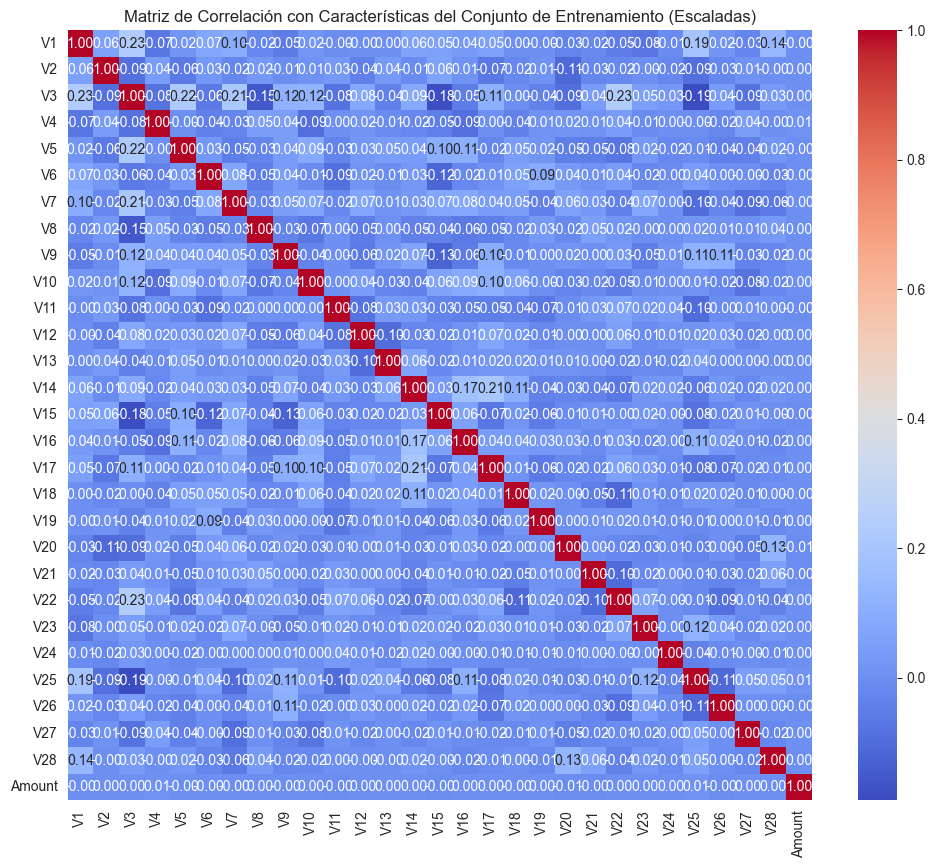

Dimensiones de X_train_scaled: (79999, 28)
Dimensiones de y_train: (79999,)


In [10]:
# Separar las características (V1 a V28) y la variable objetivo (Amount) para el conjunto de entrenamiento
X_train = train_data.drop(columns=['Amount', 'Time'])
y_train = train_data['Amount']

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir a DataFrame con las mismas columnas originales
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Visualizar correlaciones entre las características y con la variable objetivo
plt.figure(figsize=(12, 10))
correlation_matrix = pd.concat([X_train_scaled, y_train], axis=1).corr()  # Incluir 'Amount' en el cálculo de correlación
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación con Características del Conjunto de Entrenamiento (Escaladas)')
plt.show()

# Revisión de las dimensiones del conjunto de datos modificado
print(f'Dimensiones de X_train_scaled: {X_train_scaled.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')

Explicación de las Secciones:

- Escalar las características: Utiliza StandardScaler para estandarizar las características, ajustándolas para que tengan una media de 0 y una desviación estándar de 1.

- Convertir a DataFrame: Después de escalar, se convierte el array resultante de nuevo a un DataFrame, manteniendo las columnas originales para facilitar el análisis posterior.

- Visualizar correlaciones: Se crea una matriz de correlación que incluye las características escaladas y la variable objetivo, permitiendo observar cómo se relacionan.

- Revisión de dimensiones: Se imprimen las dimensiones del conjunto de características escaladas y de la variable objetivo, lo que ayuda a verificar que los datos están en el formato correcto antes de proceder con el modelado.

# Paso 4: Modelar
Elegir un modelo apropiado. Entrenamos el modelo utilizando los datos de entrenamiento. Validamos su desempeño en el conjunto de validación. Dada la naturaleza del conjunto de datos y nuestra variable objetivo (Amount), este es un problema de regresión.

Nuestro objetivo es predecir el monto de la tarjeta de crédito que se le quiere dar a estas personas. Para ello, los modelos que utilizaremos son:

- Regresión Lineal
- Regresión de Ridge
- Regresión Lasso
- Random Forest
- Gradient Boosting 

## Modelo 1: Regresión lineal

MSE: 4014.09, R^2: 0.94


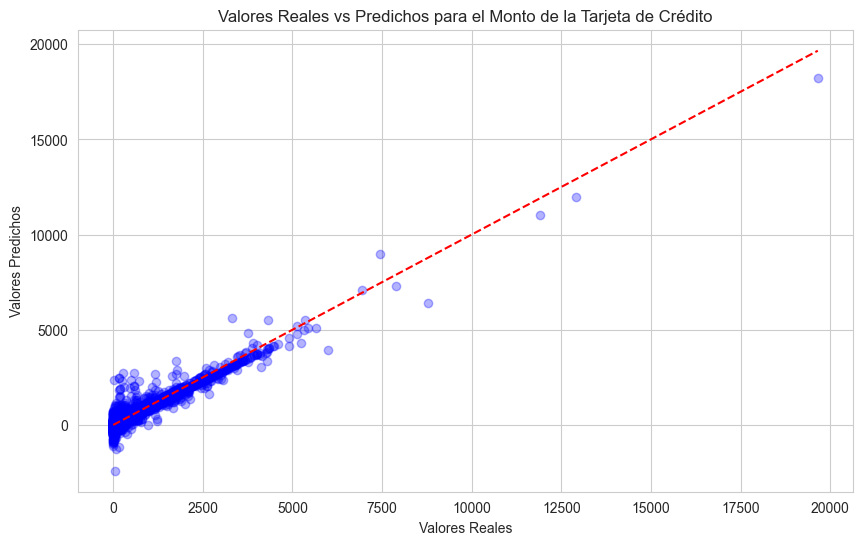

In [11]:
# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_train_scaled)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'MSE: {mse:.2f}, R^2: {r2:.2f}')

# Graficar valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.3, color='b')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos para el Monto de la Tarjeta de Crédito')
plt.show()

- Mean Squared Error (MSE) - (Error cuadratico medio): Este valor mide la diferencia promedio al cuadrado entre las predicciones del modelo y los valores reales. Un MSE más bajo indica que el modelo tiene un mejor desempeño, ya que significa que las predicciones están más cerca de los valores reales.

- R^2 Score (Valor de la varianza): Este valor indica la proporción de la varianza en la variable dependiente (monto de crédito) que es predecible a partir de las variables independientes (V1 a V28). Un R² más cercano a 1 indica que el modelo explica bien la variabilidad de la variable objetivo. Por ejemplo, un R² de 0.85 significa que el 85% de la variabilidad del monto de crédito se puede explicar por las características utilizadas en el modelo.

El gráfico de dispersión "Valores Reales vs. Valores Predichos" para el monto de la tarjeta de crédito permite evaluar el rendimiento de nuestro modelo de regresión lineal en la predicción de la variable objetivo ("Amount").

- Línea de identidad: La línea roja discontinua representa la "línea de identidad", donde 𝑦 real = 𝑦 predicho. Si el modelo fuera perfecto, todos los puntos caerían sobre esta línea.

- Distribución de los puntos:

Cercanía a la línea de identidad: Cuanto más cercanos estén los puntos a esta línea, mejor será el rendimiento del modelo en la predicción de los montos.

Dispersión de los puntos: Si los puntos están ampliamente dispersos alrededor de la línea de identidad, esto indicará que el modelo tiene problemas para ajustar correctamente los datos, reflejando errores de predicción elevados.

## Modelo 2: Regresión Ridge

Alpha: 0.1 - MSE Ridge: 4014.09, R^2 Ridge: 0.94


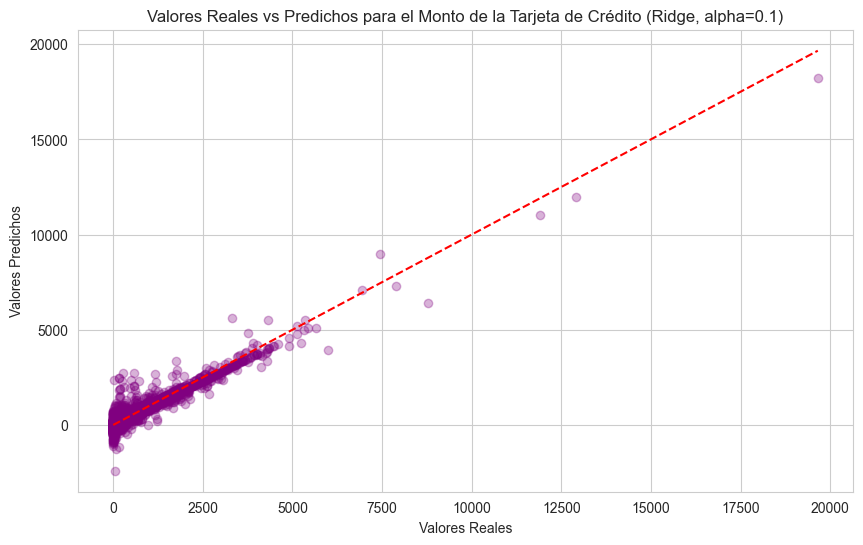

Alpha: 1 - MSE Ridge: 4014.09, R^2 Ridge: 0.94


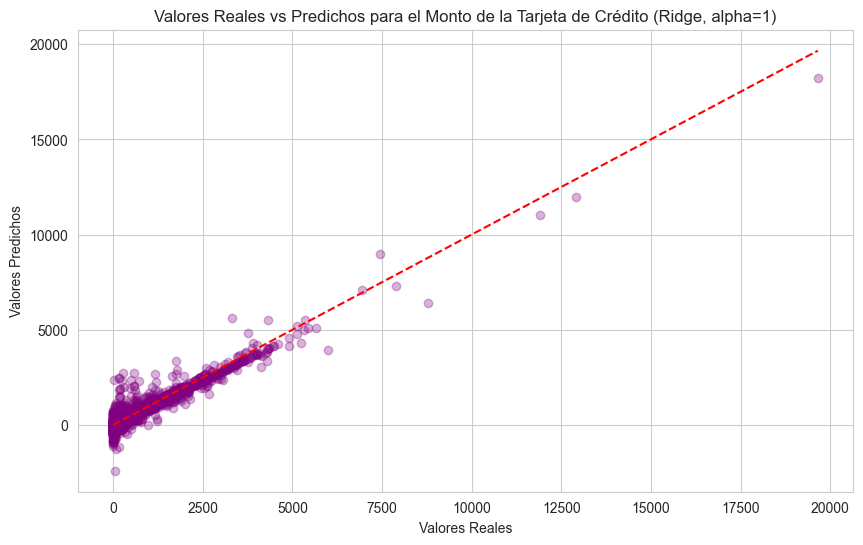

Alpha: 10 - MSE Ridge: 4014.09, R^2 Ridge: 0.94


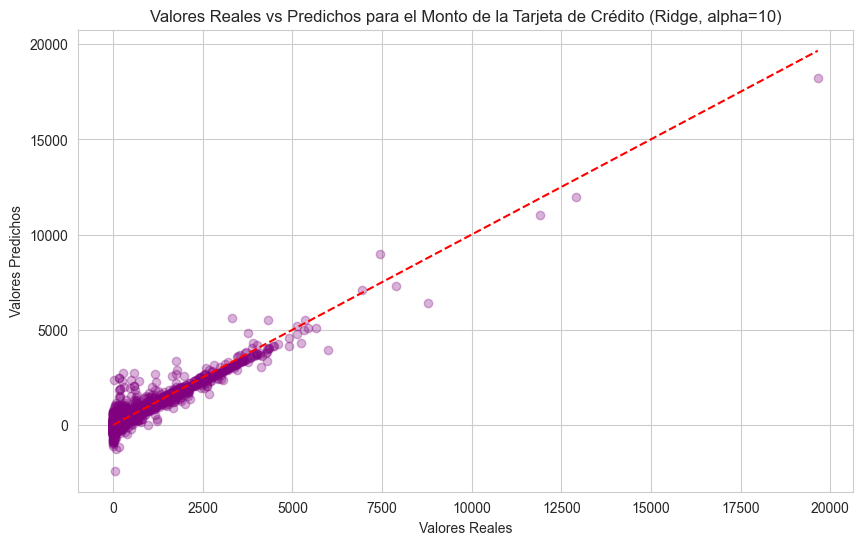

Alpha: 100 - MSE Ridge: 4014.18, R^2 Ridge: 0.94


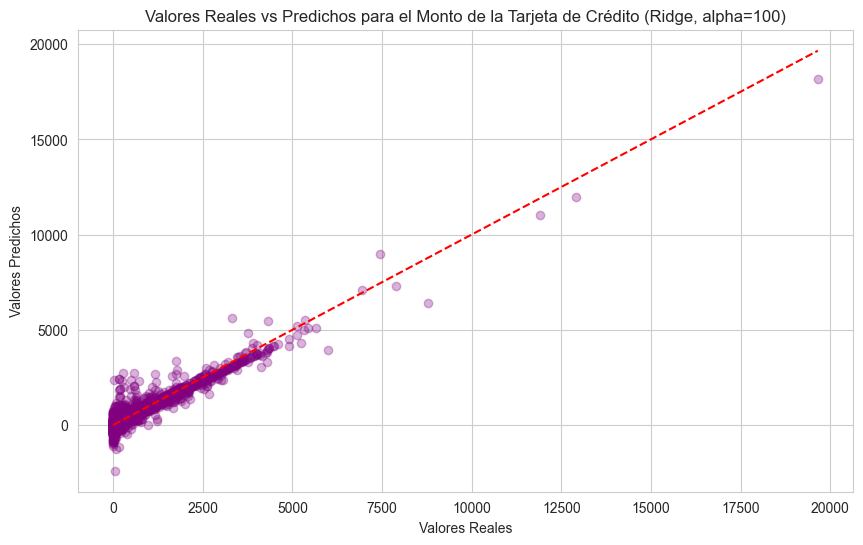

Alpha: 1000 - MSE Ridge: 4022.81, R^2 Ridge: 0.94


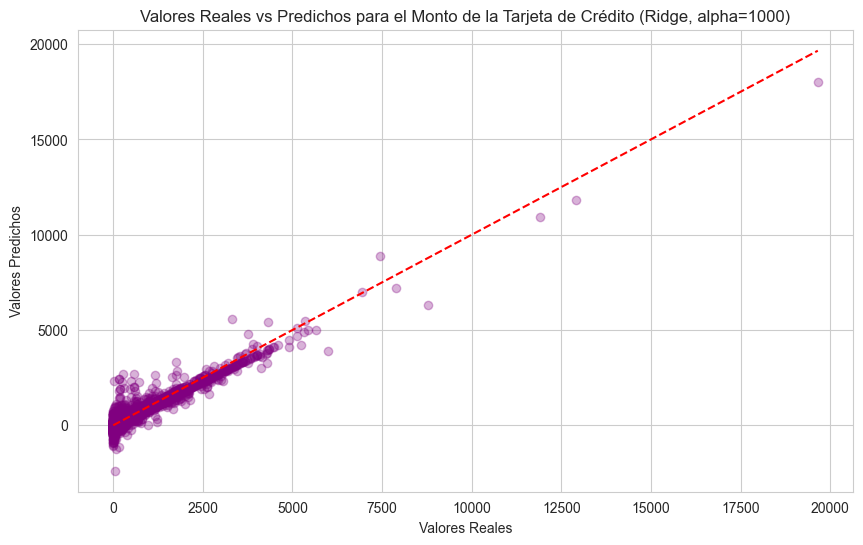

In [12]:
# Configuración de diferentes valores de alpha para el modelo Ridge
alphas = [0.1, 1, 10, 100, 1000]

# Bucle para entrenar el modelo Ridge con distintos valores de alpha
for alpha in alphas:
    # Configurar y entrenar el modelo de regresión Ridge
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    
    # Realizar predicciones con el modelo Ridge
    y_pred_ridge = ridge_model.predict(X_train_scaled)
    
    # Calcular el error cuadrático medio y el coeficiente de determinación (R^2) para el modelo Ridge
    mse_ridge = mean_squared_error(y_train, y_pred_ridge)
    r2_ridge = r2_score(y_train, y_pred_ridge)
    print(f'Alpha: {alpha} - MSE Ridge: {mse_ridge:.2f}, R^2 Ridge: {r2_ridge:.2f}')
    
    # Graficar valores reales vs predichos para el modelo Ridge
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, y_pred_ridge, alpha=0.3, color='purple')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title(f'Valores Reales vs Predichos para el Monto de la Tarjeta de Crédito (Ridge, alpha={alpha})')
    plt.show()

- Ridge(alpha=1.0): El parámetro alpha controla la intensidad de la regularización L2. Un valor más alto de alpha aumenta la regularización, lo cual puede ayudar a evitar el sobreajuste pero también puede limitar la precisión del modelo. Comienza con alpha=1.0 y ajusta este parámetro según los resultados.

- Evaluación: El código calcula el error cuadrático medio y el puntaje R², igual que en la regresión lineal, para medir el ajuste del modelo.

- La regresión Ridge es útil para conjuntos de datos con múltiples características correlacionadas o donde deseas reducir la sensibilidad del modelo a pequeñas fluctuaciones en los datos, lo que puede mejorar la precisión en el conjunto de validación o prueba.

Al obtener los mismos valores para el error cuadrático medio (MSE) y el puntaje de varianza (R²) en la regresión lineal y la regresión Ridge, esto indica lo siguiente:

- Baja multicolinealidad: Si tus variables no presentan correlaciones fuertes entre sí (es decir, baja multicolinealidad), entonces la regularización de Ridge (que penaliza los coeficientes de características correlacionadas) no tiene mucho impacto. Ridge es especialmente útil cuando existe multicolinealidad, por lo que si esta es baja o no existe, el modelo Ridge se comportará muy similar a la regresión lineal estándar.

- Modelo adecuado sin regularización: En este caso, el modelo de regresión lineal puede ser ya suficientemente preciso para tus datos, y la regularización de Ridge no mejora significativamente el rendimiento.

- Valor de alpha en Ridge: Si alpha es pequeño (por ejemplo, cerca de 0), entonces la regresión Ridge se comporta casi como una regresión lineal sin regularización. Puedes experimentar aumentando el valor de alpha para ver si Ridge mejora, aunque esto podría no ser necesario si ya tienes buenos resultados con la regresión lineal.

Debido a que el modelo de regresión lineal estándar ya está ajustando los datos sin sobreajuste, la penalización en la regresión Ridge no hace mucha diferencia. Esto puede ocurrir si los datos tienen una relación relativamente lineal y no contienen mucha variabilidad o ruido. Es por ello que el grafico de regresión lineal y de ridge se muestran con tanta similitud.

## Modelo 3: Regresión Lasso

Alpha: 0.1 - MSE Lasso: 4014.36, R^2 Lasso: 0.94


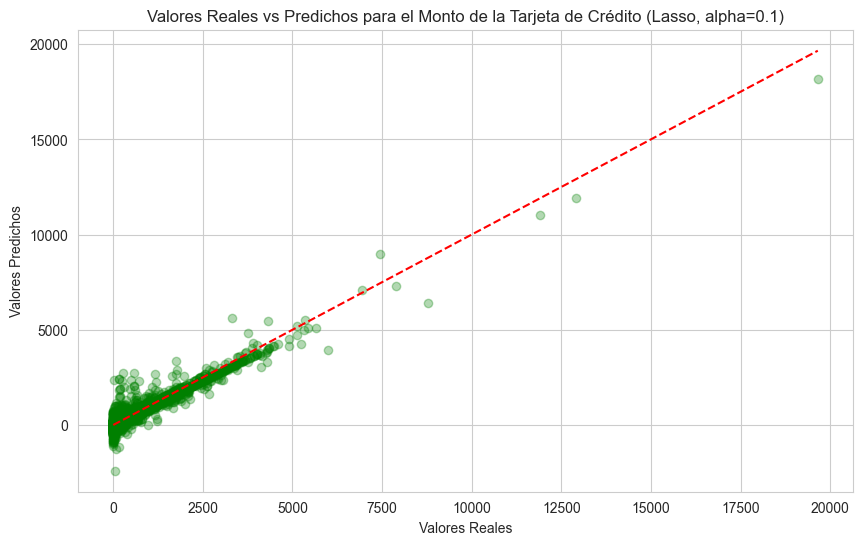

Alpha: 1 - MSE Lasso: 4038.09, R^2 Lasso: 0.94


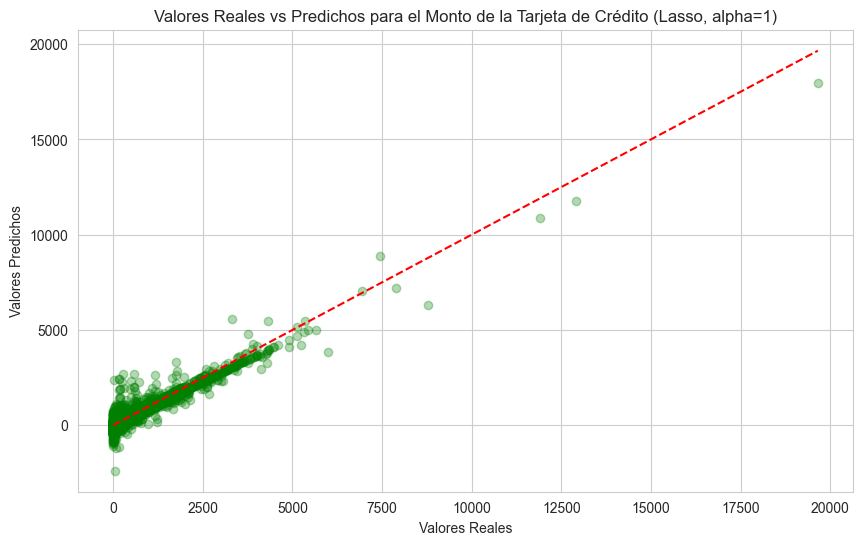

Alpha: 10 - MSE Lasso: 5797.67, R^2 Lasso: 0.92


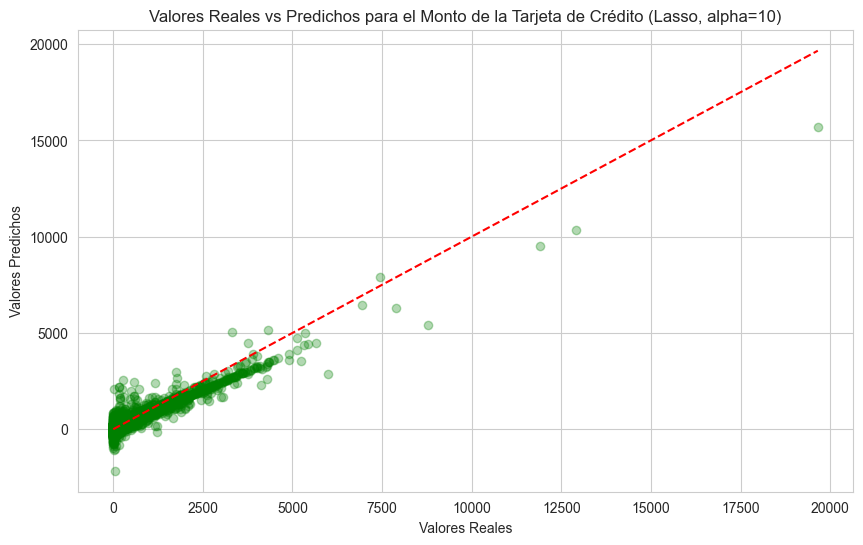

Alpha: 100 - MSE Lasso: 54637.27, R^2 Lasso: 0.22


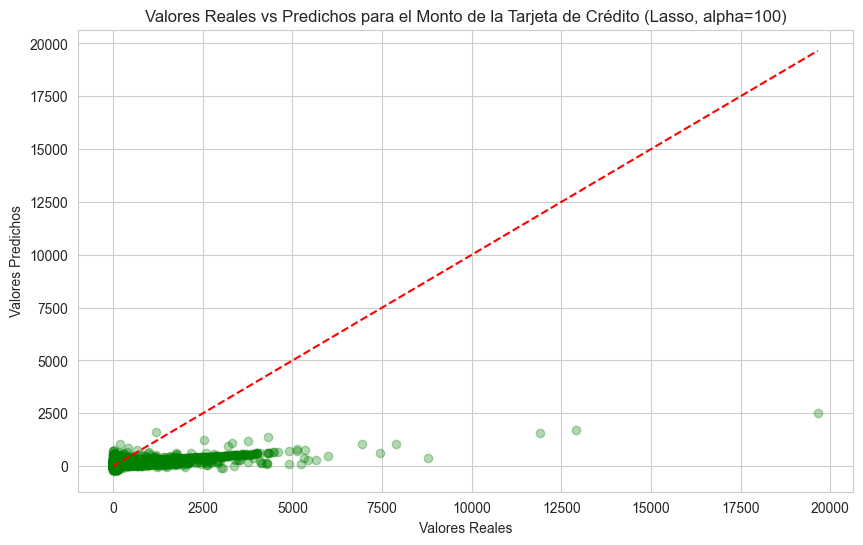

In [13]:
# Configuración de diferentes valores de alpha para el modelo Lasso
alphas = [0.1, 1, 10, 100]

# Bucle para entrenar el modelo Lasso con distintos valores de alpha
for alpha in alphas:
    # Configurar y entrenar el modelo de regresión Lasso
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    
    # Realizar predicciones con el modelo Lasso
    y_pred_lasso = lasso_model.predict(X_train_scaled)
    
    # Calcular el error cuadrático medio y el coeficiente de determinación (R^2) para el modelo Lasso
    mse_lasso = mean_squared_error(y_train, y_pred_lasso)
    r2_lasso = r2_score(y_train, y_pred_lasso)
    print(f'Alpha: {alpha} - MSE Lasso: {mse_lasso:.2f}, R^2 Lasso: {r2_lasso:.2f}')
    
    # Graficar valores reales vs predichos para el modelo Lasso
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, y_pred_lasso, alpha=0.3, color='green')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title(f'Valores Reales vs Predichos para el Monto de la Tarjeta de Crédito (Lasso, alpha={alpha})')
    plt.show()

- Prueba de diferentes valores de alpha: El bucle for entrena el modelo Lasso con cada valor en la lista alphas. Un alpha mayor implica una mayor regularización, lo que puede hacer que el modelo descarte más características.

- Gráfico para cada alpha: Para cada valor de alpha, se genera un gráfico de dispersión separado que permite comparar cómo cambia la precisión del modelo con cada nivel de regularización.

## Modelo 4: Random Forest

MSE Random Forest: 458.04, R^2 Random Forest: 0.99


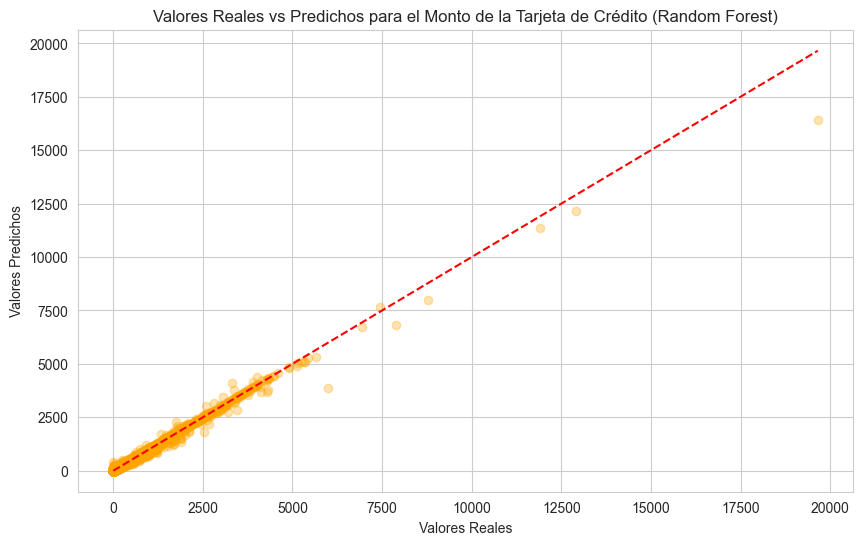

In [14]:
# Configuración del modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo Random Forest
y_pred_rf = random_forest_model.predict(X_train_scaled)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2) para el modelo Random Forest
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print(f'MSE Random Forest: {mse_rf:.2f}, R^2 Random Forest: {r2_rf:.2f}')

# Graficar valores reales vs predichos para el modelo Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_rf, alpha=0.3, color='orange')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos para el Monto de la Tarjeta de Crédito (Random Forest)')
plt.show()

Al aplicar el modelo de regresión Random Forest, donde el MSE bajó significativamente a 457 y el R² aumentó a 0.99, podemos concluir que este modelo es notablemente más preciso que los modelos de regresión lineal, Ridge y Lasso.

Esto indica que Random Forest es capaz de capturar mejor las relaciones complejas en los datos, proporcionando predicciones que se ajustan mucho más a los valores reales. Esta mejora sugiere que las relaciones en los datos no son completamente lineales y se benefician de un modelo que puede identificar patrones más profundos y no lineales.

Aplicamos Random Forest utilizando un promedio de predicciones de 100 árboles, lo cual aumenta la estabilidad y precisión del modelo al minimizar el impacto de variaciones en los datos.

## Modelo 5: Gradient Boosting

MSE Gradient Boosting: 1963.34, R^2 Gradient Boosting: 0.97


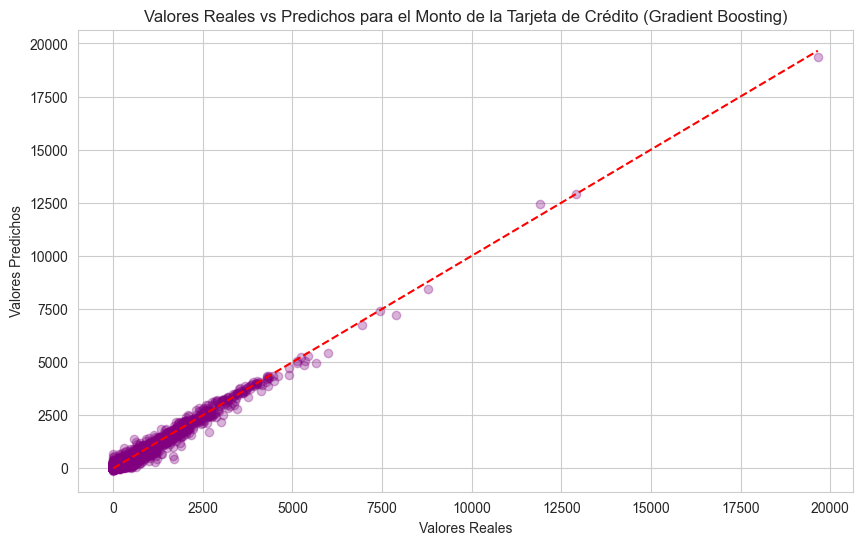

In [15]:
# Configuración del modelo Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo Gradient Boosting
y_pred_gb = gradient_boosting_model.predict(X_train_scaled)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2) para el modelo Gradient Boosting
mse_gb = mean_squared_error(y_train, y_pred_gb)
r2_gb = r2_score(y_train, y_pred_gb)
print(f'MSE Gradient Boosting: {mse_gb:.2f}, R^2 Gradient Boosting: {r2_gb:.2f}')

# Graficar valores reales vs predichos para el modelo Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_gb, alpha=0.3, color='purple')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos para el Monto de la Tarjeta de Crédito (Gradient Boosting)')
plt.show()

Al aplicar el modelo de regresión Gradient Boosting, obtuvimos un MSE de 1963 y un R² de 0.97. Estos resultados muestran que el modelo es altamente preciso, reduciendo el error respecto a la regresión lineal, Ridge y Lasso, aunque con un MSE ligeramente superior al obtenido con Random Forest (457).

Gradient Boosting ha capturado bien la variabilidad en los datos, acercándose a Random Forest en rendimiento. Este modelo se ajusta entrenando 100 árboles de decisión secuenciales, donde cada árbol corrige los errores del anterior, logrando capturar patrones complejos en los datos.

En comparación, Random Forest sigue siendo el modelo con mayor precisión en este caso, pero Gradient Boosting también representa una mejora importante en precisión y captura de patrones complejos sobre los modelos lineales, con un ajuste moderado sin ser demasiado complejo.

# Paso 5: Evaluar

- En este análisis de regresiones, observamos que la regresión lineal sin regularización produjo un buen ajuste para predecir el monto de la tarjeta de crédito, con valores de MSE de 4014.09 y R² de 0.94, lo cual indica un alto nivel de precisión.

- Al introducir la regresión Lasso y Ridge, el valor de alpha, que controla la regularización, mostró efectos distintos en cada modelo. Con Ridge, incluso con valores altos de alpha, el modelo mantuvo los valores de MSE y R² similares a los de la regresión lineal, sugiriendo que la regularización adicional no fue significativa en estos datos. En cambio, en el modelo Lasso, aunque los valores de MSE y R² no variaron al inicio, un alpha creciente impactó negativamente en la dispersión, alejando los puntos de la línea de identidad y afectando la precisión de las predicciones. Esto se debe a que alpha en Lasso reduce algunos coeficientes a cero para simplificar el modelo, sacrificando la precisión al eliminar características importantes.

- Así, el valor de alpha cumple el rol de controlar la penalización en los modelos Ridge y Lasso; en Ridge, reduce el tamaño de los coeficientes suavemente, mientras que en Lasso puede eliminar características, siendo útil solo si existen variables no relevantes o alta multicolinealidad.

- En el análisis de modelos avanzados, Random Forest y Gradient Boosting mostraron mejoras significativas en la precisión de las predicciones. El modelo de Random Forest obtuvo el mejor rendimiento, con un MSE de 457 y R² de 0.99, capturando de manera más precisa las relaciones complejas en los datos y reduciendo de manera efectiva el error en las predicciones. Esto sugiere que las relaciones en los datos tienen una estructura no lineal que Random Forest puede capturar mediante el promedio de múltiples árboles de decisión. Por otro lado, el modelo de Gradient Boosting también mejoró el rendimiento respecto a los modelos lineales y de regularización, obteniendo un MSE de 1963 y un R² de 0.97, aunque ligeramente inferior a Random Forest. Gradient Boosting captura patrones complejos en los datos mediante ajustes secuenciales y corrección de errores, pero no alcanza la precisión observada en Random Forest.

- En conclusión, el modelo de regresión lineal sin regularización fue adecuado inicialmente, mostrando que los datos siguen una relación bastante lineal. Sin embargo, la comparación con Random Forest y Gradient Boosting revela que Random Forest es el modelo más preciso para este conjunto de datos, ya que optimiza la captura de relaciones complejas y minimiza el error. Los modelos de regresión Lasso y Ridge no mejoraron el rendimiento respecto a la regresión lineal y, en el caso de Lasso, la regularización excesiva afectó negativamente la precisión de las predicciones, sugiriendo que no existen problemas de multicolinealidad o sobreajuste en los datos que justifiquen su uso en este contexto.